<a href="https://colab.research.google.com/github/prabhashmahata/pmahata/blob/main/nsm_ml_poly_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial curve fitting – illustration

Credits: [Original code](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html) from **sklearn** package. All rights with the original developers.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

Generates the training data using a TRUE function

In [8]:
# The true function

def true_fun(X):
    return np.cos(1.5 * np.pi * X)


# Generates training data

np.random.seed(0) # sets the random seed
n_samples = 30 # number of training samples
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Visualize the training data



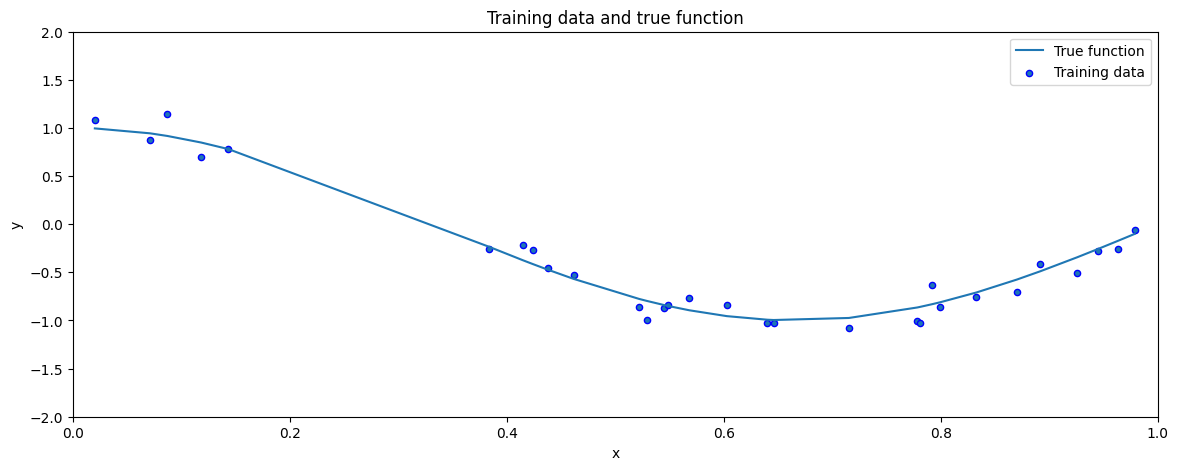

In [6]:
plt.figure(figsize=(14, 5))

plt.plot(X, true_fun(X), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Training data and true function")
plt.show()

Polynomial curve fitting with the help of linear regression model



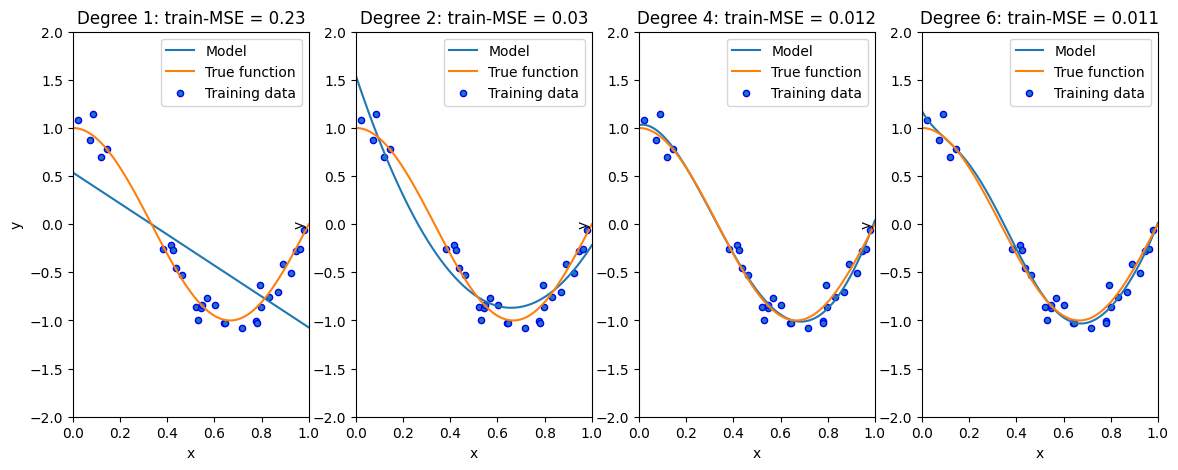

In [7]:
degrees = [1, 2, 4, 6] # selected degrees

# Plots polynomial curve fitting output with different degree

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)

  # Fits the model
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=True)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
  pipeline.fit(X[:, np.newaxis], y)

  # Prediction and evaluation
  y_pred = pipeline.predict(X[:, np.newaxis])
  score = mean_squared_error(y_pred, y)

  # Plots predicted y values along with the true function output
  # for the test values of x
  X_test = np.linspace(0, 1, 100)

  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
  plt.plot(X_test, true_fun(X_test), label="True function")
  plt.scatter(X, y, edgecolor='b', s=20, label="Training data")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.legend(loc="best")
  plt.title("Degree {}: train-MSE = {:.2}".format(degrees[i], score))

plt.show()